# K-Means Clustering (KMC) on TCGA Cancer Gene Expression

**Name**:  Conor Brooke  
**Student-ID**:  C00260735  
**Date**:  29/02/2024  
**Link To Guide Followed**:  [Real Python](https://realpython.com/k-means-clustering-python/)  

  
## Notebook Overview

This notebook provides an exploration of K-Means Clustering, an unsupervised learning algorithm widely recognized for its efficiency in grouping unlabelled data. I delve into the application of K-Means Clustering on `The Cancer Genome Atlas (TCGA)` dataset. The analysis includes multiple phases, including data preprocessing, the clustering process, and the evaluation of results. By investigating the TCGA dataset, the notebook aims to uncover meaningful patterns and insights into genomic data clustering. This exploration highlights K-Means Clustering's capability in revealing data groupings without prior labels.

<br>  

> **Note**: This notebook is part of my Data Science Continuous Assessment portfolio. The notebook followed has been enhanced significantly from the original version downloaded from Real Python to deepen both theoretical and practical understanding of the underlying machine learning algorithm(s). The differences are documented in the notebooks log to track the evolution of the notebook and analyze the algorithm's performance.

# Notebook Log

## K-Means Clustering (KMC)

K-Means Clustering is a powerful unsupervised learning algorithm used to identify clusters within an unlabeled dataset. Unlike supervised learning methods that require labeled data, K-Means tries to group data points into a set number of clusters based on similarity. The 'K' in K-Means represents the number of clusters. The algorithm iteratively assigns each data point to the nearest cluster while minimizing the variance within each cluster.

### Example: Genomic Data Clustering

Consider a dataset from The Cancer Genome Atlas (TCGA), containing genomic expressions of various samples without specific labels. Applying K-Means Clustering with K=3 aims to classify these samples into three distinct clusters, potentially corresponding to different cancer subtypes:

1. **Select Features**: The analysis includes genomic features such as gene expression levels across multiple samples.
2. **Choose K**: Choosing K=3 directs the algorithm to find three distinct groups within the TCGA dataset.
3. **Initialize Centroids**: Randomly select three samples as the initial centroids of the clusters.
4. **Assign Clusters**: Each sample in the dataset is assigned to the nearest cluster based on Euclidean distance to the centroids.
5. **Update Centroids**: Recalculate the centroids of each cluster by taking the mean of all samples assigned to that cluster.
6. **Iterate**: Repeat the assignment and update steps until the centroids no longer significantly shift, indicating that the clusters have stabilized.

### Considerations

K-Means Clustering is know for its simplicity in exploring the intrinsic structure of data. However, it requires the number of clusters to be specified and is sensitive to the initial placement of centroids.

<br>  


In [144]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

The code snippet generates a synthetic dataset using the `make_blobs` function, designed to simulating a collection of data points grouped into blobs or clusters.

- `n_samples=200`: This specifies the total number of data points generated for the dataset.
- `centers=3`: This defines the number of centers or clusters in the dataset. In line with the K-Means example, it matches the chosen value of K=3, simulating a scenario with three distinct genomic data clusters.
- `cluster_std=2.75`: This sets the standard deviation of the clusters, controlling how spread out each cluster is. A standard deviation of 2.75 indicates a moderate spread around each cluster center.

This function returns two arrays: `features`, containing the coordinates of the 200 data points, and `true_labels`, indicating the cluster each data point belongs to.

In [145]:
features, true_labels = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [146]:
features[:5]

array([[ -8.14286966,  -9.21718161],
       [ -9.24576395,  -7.93763734],
       [ -0.24719911,   5.65696609],
       [  4.04125553,   4.99480603],
       [-12.48446966,  -9.65234695]])

In [147]:
true_labels[:5]

array([2, 2, 0, 1, 2])

Below scales the `features` using `StandardScaler` from `sklearn.preprocessing`, which standardizes the data by removing the mean and scaling to unit variance. `scaled_features` contains the transformed data. This step is crucial for clustering algorithms like K-Means, ensuring equal contribution from all features.

In [148]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[-1.16966133, -1.47111779],
       [-1.36689329, -1.29273268],
       [ 0.24233125,  0.60253182],
       [ 1.00924092,  0.5102181 ],
       [-1.94607506, -1.53178549]])

Initializing a `KMeans` clustering model with specific parameters: <br>   
    `init="random"` selects random centroids initially  
    `n_clusters=4` sets four clusters to form  
    `n_init=10` repeats the algorithm 10 times with different centroids  
    `max_iter=400` allows up to 400 iterations per run.  

In [149]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=400,
    random_state=42
)

#### Fitting the KMeans model to the scaled_features data

In [150]:
kmeans.fit(scaled_features)

# Extract cluster centers and labels for each point
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [151]:
labels

array([2, 2, 1, 1, 2, 3, 0, 3, 0, 0, 0, 3, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0,
       3, 2, 0, 2, 2, 1, 3, 0, 0, 0, 2, 0, 2, 0, 2, 3, 2, 3, 3, 0, 2, 1,
       0, 0, 2, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 0, 3, 0, 2, 3, 3, 1, 2, 1,
       1, 2, 2, 0, 3, 2, 2, 0, 0, 2, 2, 1, 0, 3, 0, 0, 2, 0, 3, 2, 2, 1,
       3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 3, 1, 0, 1, 1, 0, 3, 2,
       3, 0, 0, 0, 0, 3, 2, 1, 2, 1, 3, 3, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 3, 3, 2, 0, 2, 0, 0, 1, 0, 1, 1, 3, 0, 3, 0, 0, 2, 3, 2,
       0, 1, 3, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3,
       3, 0, 3, 3, 2, 0, 2, 3, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3,
       0, 2, 0, 0, 1, 1, 0, 3, 2, 2, 3, 0, 0, 2, 3, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 3, 3, 2, 3, 2, 2, 2, 3,
       3, 0, 2, 1, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       3, 1, 2, 3, 3, 0, 0, 3, 1, 3, 2, 2, 2, 0, 1, 0, 1, 3, 3, 1, 2, 3,
       2, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 2, 2])

In [152]:
centroids

array([[-0.30335387,  1.14211241],
       [ 0.59203085,  0.30362623],
       [-0.96668646, -1.18815893],
       [ 1.47271196,  0.03992565]])

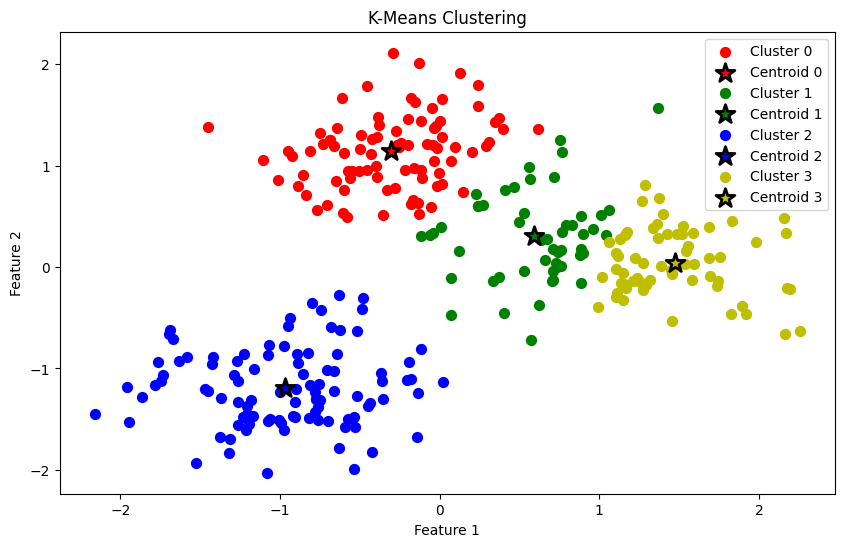

In [153]:
plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'y']
# Loop through each cluster defined by KMeans
for i in range(kmeans.n_clusters):
    # Select data points that belong to the current cluster
    points = scaled_features[labels == i]
    # Plot these points with the same color to indicate they belong to the same cluster
    plt.scatter(points[:, 0], points[:, 1], s=50, color=colors[i], label=f'Cluster {i}')
    # Plot the centroid of the current cluster with a distinct marker
    plt.scatter(centroids[i, 0], centroids[i, 1], s=200, color=colors[i], edgecolor='black', linewidth=2, marker='*', label=f'Centroid {i}')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Using the Elbow Method to Choose the Appropriate Number of Clusters

The code below runs several k-means, incrementing k with each iteration and recording the SSE (sum of the squared error)

In [154]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [155]:
sse

[600.0,
 253.3220455473484,
 105.43712315800346,
 88.64584088068723,
 73.58397075913196,
 62.22078856039616,
 54.34909073933184,
 49.19478945946425,
 42.686547177682236,
 38.54534785790722,
 34.928858231789356,
 30.735379943830264,
 28.58572346568917,
 28.01167322577683]

When SSE is plotted as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

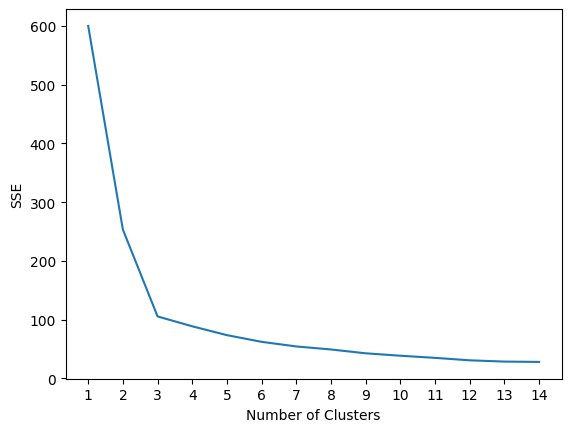

In [156]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The Elbow point is the sweet spot where the SSE curve starts to bend. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3.

### Using the Silhouette Coefficient to Choose the Appropriate Number of Clusters

The silhouette coefficient evaluates how close each point is to its own cluster compared to other clusters, with values ranging from -1 to 1. Higher values signify better cluster fit.

In [157]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# You start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

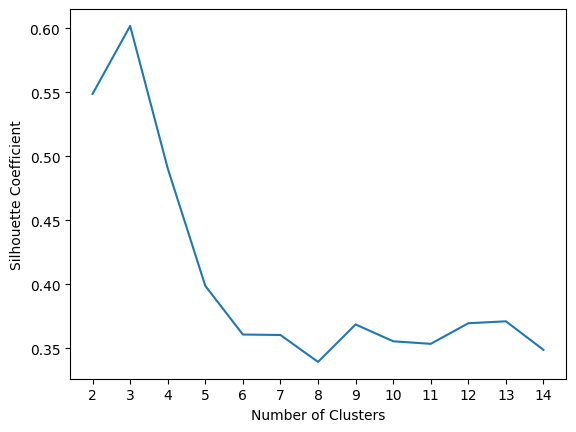

In [158]:
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the highest coefficient.

### Evaluating Clustering Performance Using DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

The elbow method and silhouette coefficient assess clustering quality without ground truth labels. However, their effectiveness may vary, especially for complex, nonspherical clusters, where they might not align with human intuition, underscoring the need for advanced evaluation methods.

In [159]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

This time, I'm using make_moons() to generate synthetic data in the shape of crescents.

In [160]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [161]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

c:\Users\c_bro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DBSCAN(eps=0.3)

#### Compute the silhouette scores for each algorithm

In [162]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
kmeans_silhouette

0.5

In [163]:
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)
dbscan_silhouette

0.38

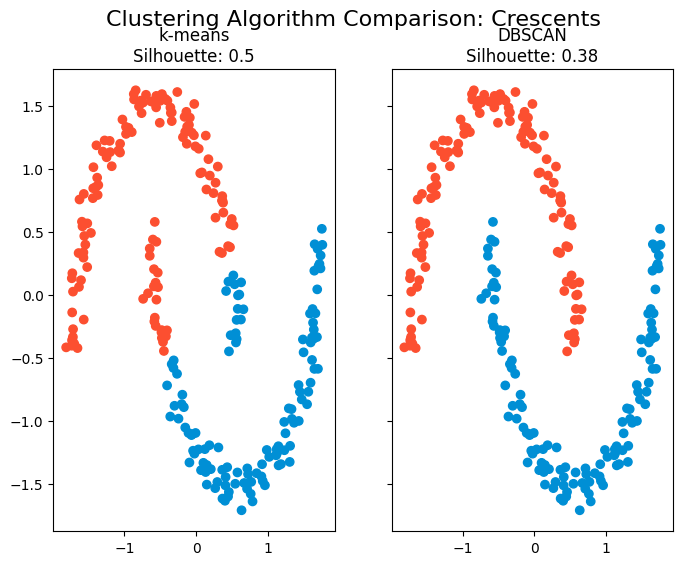

In [164]:
# Setup figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison: Crescents", fontsize=16)

# Define colors and titles for each subplot
colors = {0: "#008fd5", 1: "#fc4f30"}
algorithms = [('k-means', kmeans.labels_, kmeans_silhouette),
              ('DBSCAN', dbscan.labels_, dbscan_silhouette)]

# Plotting loop
for ax, (title, labels, silhouette) in zip(axes, algorithms):
    ax.scatter(scaled_features[:, 0], scaled_features[:, 1], c=[colors[label] for label in labels])
    ax.set_title(f"{title}\nSilhouette: {silhouette}", fontsize=12)

plt.show()

The plot above visualizes the comparison between two clustering algorithms, k-means and DBSCAN.  <br>  

This visualization helps in evaluating and comparing the performance and suitability of k-means and DBSCAN clustering algorithms for a given dataset, using silhouette scores as a measure and colored scatter plots for a visual assessment.


### Comparing the clustering results of DBSCAN and k-means using ARI (adjusted rand index) as the performance metric

A score close to 1 indicates perfectly labeled clusters.

In [165]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

round(ari_kmeans, 2)

0.47

In [166]:
round(ari_dbscan, 2)

1.0

<br>  


## TCGA Cancer Gene Expression using K-Means Clustering

**Link To TCGA Cancer Gene Dataset**:  [The Cancer Genome Atlas Program](https://www.cancer.gov/ccg/research/genome-sequencing/tcga)   

## Data Understanding

### Initial Data Collection Report
- **TCGA Cancer Gene Expression Dataset**: This dataset contains gene expression profiles from The Cancer Genome Atlas (TCGA) project, specifically focusing on five types of cancer. The data includes over 20,000 gene expression features measured across 801 samples, providing a great dataset for clustering.

### Data Description

- **Size**: 801 entries
- **Number of features**: 
    - **1 Categorical feature**: The label indicating the type of cancer (`PRAD`, `LUAD`, `BRCA`, `KIRC`, `COAD`).
    - **20,531 Continuous features**: These represent the gene expression levels, quantified and normalized across various genes.
- **Null values**: None
- **Duplicate rows**: 0
- **Gene Labels**: The dataset is labeled with five cancer types, coded as `['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']`. These labels provide a basis for clustering in unsupervised learning.

- **Source**: The data is sourced from The Cancer Genome Atlas (TCGA) project, a cancer genomics program that characterized over 20,000 primary cancer and matched normal samples spanning 33 cancer types.

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [168]:
gene_data = pd.read_csv('Datasets/data.csv')
gene_labels = pd.read_csv('Datasets/labels.csv')

In [169]:
gene_data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [170]:
gene_labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [171]:
gene_labels['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [172]:
print(len(gene_data))

801


In [173]:
print(len(gene_labels))

801


In [174]:
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [175]:
gene_data.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [176]:
gene_data.duplicated().sum()

0

In [177]:
gene_data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


#### To use the labels, discussed above, in the evaluation methods, the abbreviations need to be converted to integers with LabelEncoder.

In [178]:
label_encoder = LabelEncoder()

converted_labels = label_encoder.fit_transform(gene_labels['Class'])

converted_labels

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

The label_encoder has now been fitted to the data:

In [179]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

 Storing the length of the array to the variable n_clusters

In [180]:
n_clusters = len(label_encoder.classes_)

In [181]:
n_clusters

5

### Building a K-Means Clustering Pipeline

To enchance the analysis of the TCGA dataset with 20,000+ features, I will build a preprocessing and clustering pipeline using scikit-learn's pipeline capabilities. This pipeline ensures that all preprocessing steps are applied consistently. The pipeline will implement the following key components:

- **Dimensionality Reduction**: Given the high-dimensional of the dataset, implementing Dimensionality Reduction is crucial to mitigate the "curse of dimensionality". I'm using **Principal Component Analysis (PCA)** as the dimensionality reduction technique, transforming the input data into a lower-dimensional space.

- **Feature Scaling**: To ensure that all features contribute equally to the distance calculations used in K-Means Clustering, I'm applying **MinMaxScaler**.


Below is a pipeline to process the data, I'll build a separate pipeline to perform k-means clustering.

In [182]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [183]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=100,
               max_iter=800,
               random_state=42,
           ),
       ),
   ]
)

The Pipeline class can be chained to form a larger pipeline. Building an end-to-end k-means clustering pipeline by passing the "preprocessor" and "clusterer" pipelines to Pipeline

In [184]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

### Data Preprocessing

In [185]:
# Dropping 'Unnamed: 0' as it serves no purpose and the data cannot be fiited with an object column in the dataset.
gene_data.drop('Unnamed: 0', axis=1, inplace=True)

Fitting the pipeline to 'gene_data' to perform the pipeline steps:

In [186]:
pipe.fit(gene_data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=800, n_clusters=5, n_init=100,
                                         random_state=42))]))])

#### Evaluating the performance by calculating the silhouette coefficient

In [187]:
preprocessed_data = pipe["preprocessor"].transform(gene_data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450304

#### Calculating the ARI, too, since the ground truth cluster labels are available

In [188]:
adjusted_rand_score(converted_labels, predicted_labels)

0.722276752060253

In [189]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(gene_data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(converted_labels)

#### Ploting the Clustering results

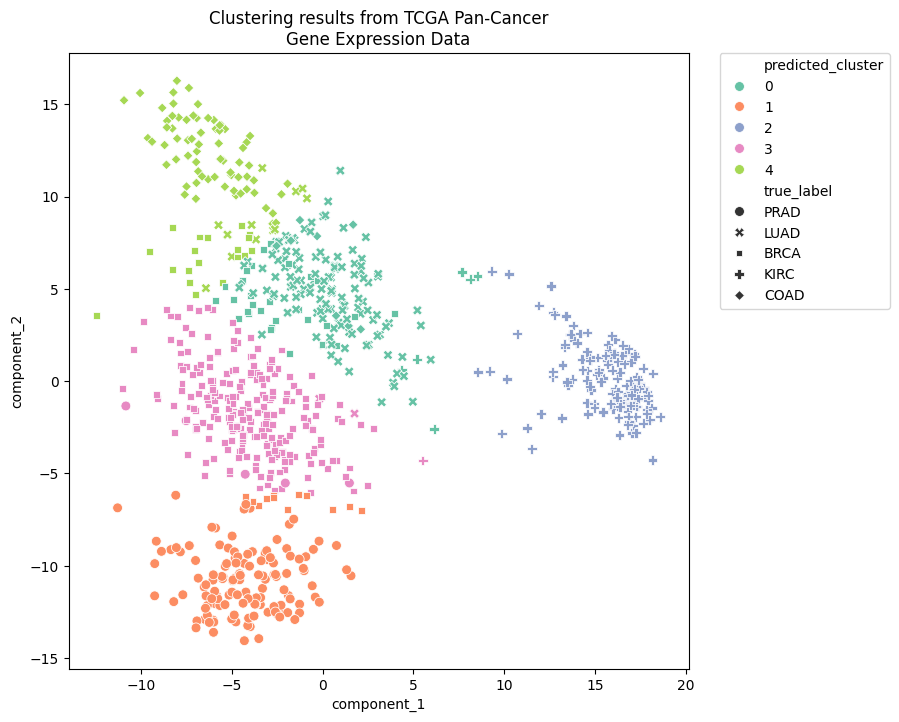

In [190]:
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
    x="component_1", 
    y="component_2", 
    s=50,           
    data=pcadf,       
    hue="predicted_cluster",  
    style="true_label",       
    palette="Set2", 
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

#### Tuning the K-Means Clustering Pipeline

Using clustering performance metrics to identify the appropriate number of components in the PCA step

In [191]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(gene_data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(gene_data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        converted_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

Plotting the evaluation metrics as a function of n_components to visualize the relationship between adding components and the performance of the k-means clustering results

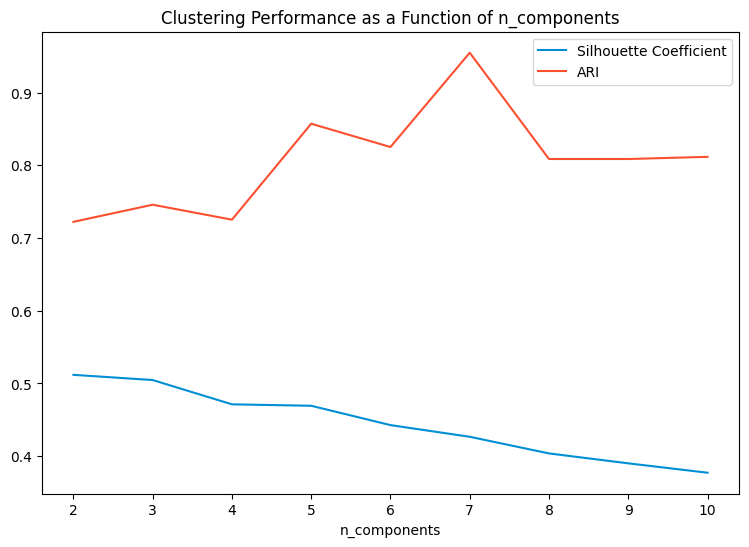

In [192]:
plt.figure(figsize=(9, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.show()

The figure highlights two main points regarding clustering performance metrics:

1. **Silhouette Coefficient**: This metric decreases linearly as the number of dimensions increases, indicating growing sparsity due to the increased distance between points.

2. **Adjusted Rand Index (ARI)**: ARI improves with the addition of components, with optimal performance observed at `n_components=7`. This suggests it as the best choice for presenting clustering results from the given pipeline.

ARI is recommended for tasks with available cluster labels, such as the cancer dataset, as it measures the accuracy of the clustering. The silhouette coefficient is suited for exploratory clustering to identify potential subclusters for further analysis.  



### Building an improved pipeline with new metrics

In [193]:
from sklearn.preprocessing import RobustScaler


preprocessor = Pipeline(
    [
        ("scaler", RobustScaler()),
        ("pca", PCA(n_components=7, random_state=42)),
    ]
)

clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=100,
               max_iter=800,
               random_state=42,
           ),
       ),
   ]
)

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

pipe.fit(gene_data)

preprocessed_data = pipe["preprocessor"].transform(gene_data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

adjusted_rand_score(converted_labels, predicted_labels)

0.9707947123060396

The `adjusted_rand_score` of 0.97079 indicates an excellent agreement between the predicted labels and the true labels. A score near 0.97 suggests that the clustering closely matches the true distribution of data points among the clusters, reflecting highly accurate clustering performance.

### Evaluation of the Result
- **High Accuracy**: A score of 0.97079 demonstrates that the K-Means clustering model has effectively identified the true underlying structure of the dataset. This high level of accuracy is impressive in unsupervised learning tasks.

- **Significance**: This high score also indicates that the chosen number of clusters (`n_clusters`), along with the preprocessing steps (scaling, dimensionality reduction), are well-suited to the dataset at hand.

### Potential Areas for Improvement
Despite the high adjusted_rand_score, the following areas could potentially improve the model further:

- **Comparative Analysis**: Applying alternative clustering algorithms (e.g., hierarchical clustering) and comparing adjusted_rand_scores could provide insights into the most suitable clustering approach.
